# PXD024844
# Age-related alterations in the testicular proteome of a non-human primate

[PRIDE link](https://www.ebi.ac.uk/pride/archive/projects/PXD024844)

[Article link](https://www.mdpi.com/2073-4409/10/6/1306)


In [1]:
#Import libraries
os.chdir("/home/robbe/ionbot/")
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import re
import numpy as np
import os
from pathlib import Path
from pyteomics import mass as pymass
import OxiAnalysis as OA
import importlib
importlib.reload(OA)
import warnings; warnings.simplefilter('ignore')

In [2]:
#quant = pd.read_csv("/home/robbe/ionbot/PXD012477/raw_files/QuantifiedPeptides.tsv", sep= "\t")
quant = pd.read_csv("/home/robbe/ionbot/ionbot_0.9.5/PXD024844/quant/QuantifiedPeptides.tsv", sep="\t")
quant.drop(list(quant.filter(regex = 'Detection Type')), axis = 1, inplace = True)
quant = quant[~quant["Protein Groups"].str.contains("sp|", na=False, regex=False)]
quant.head()

,Sequence,Base Sequence,Protein Groups,Gene Names,Organism,Intensity_20200828_1_5ug_testis_ingwar,Intensity_20200828_1_5ug_testis_obelisk,Intensity_20200828_1_5ug_testis_timon,Intensity_20200828_1_5ug_testis_wonny,Intensity_20200828_1_5ug_testis_bellamo,Intensity_20200828_1_5ug_testis_bendix,Intensity_20200828_1_5ug_testis_ilineus,Intensity_20200828_1_5ug_testis_kalonso,Intensity_20200828_1_5ug_testis_primat,Intensity_20200828_1_5ug_testis_vitali,Unnamed: 25
0,AAAAAAAAAAAAAASAGGK15|[9999514]HexNAc[S],AAAAAAAAAAAAAASAGGK,A0A5F4VSA7_CALJA,NaN,NaN,0.0,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,1.889325e+06,0.000000e+00,2.657118e+06,NaN
1,AAAAAAAAAAAAAASAGGKnan,AAAAAAAAAAAAAASAGGK,NaN,NaN,NaN,0.0,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN
2,AAAAAAAAAAAVSRnan,AAAAAAAAAAAVSR,NaN,NaN,NaN,0.0,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN
3,AAAAAAAAAACAAGGR11|Gly->Cys[G],AAAAAAAAAACAAGGR,NaN,NaN,NaN,0.0,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN
4,AAAAAAAAAAGAAGGR0|[1]Acetyl[N-TERM],AAAAAAAAAAGAAGGR,NaN,NaN,NaN,11012118.5,0.0,8176928.0,1.013174e+07,0.0,1.283988e+07,1.181445e+07,1.225976e+07,8.809513e+06,6.015383e+06,NaN


In [3]:
cols =[]
for i in quant.columns[5:-1]:
    cols.append(i)


In [4]:
OA.quantile_transform(quant, cols)

,Sequence,Base Sequence,Protein Groups,Gene Names,Organism,Intensity_20200828_1_5ug_testis_ingwar,Intensity_20200828_1_5ug_testis_obelisk,Intensity_20200828_1_5ug_testis_timon,Intensity_20200828_1_5ug_testis_wonny,Intensity_20200828_1_5ug_testis_bellamo,Intensity_20200828_1_5ug_testis_bendix,Intensity_20200828_1_5ug_testis_ilineus,Intensity_20200828_1_5ug_testis_kalonso,Intensity_20200828_1_5ug_testis_primat,Intensity_20200828_1_5ug_testis_vitali,Unnamed: 25
0,AAAAAAAAAAAAAASAGGK15|[9999514]HexNAc[S],AAAAAAAAAAAAAASAGGK,A0A5F4VSA7_CALJA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.903570,NaN,5.297146,NaN
1,AAAAAAAAAAAAAASAGGKnan,AAAAAAAAAAAAAASAGGK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AAAAAAAAAAAVSRnan,AAAAAAAAAAAVSR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AAAAAAAAAACAAGGR11|Gly->Cys[G],AAAAAAAAAACAAGGR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AAAAAAAAAAGAAGGR0|[1]Acetyl[N-TERM],AAAAAAAAAAGAAGGR,NaN,NaN,NaN,6.434444,NaN,6.201359,6.357169,NaN,6.451746,6.320898,6.486464,6.337592,6.009702,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146977,YYYVCQYCPAGNNVQTK5|[4]carbamidomethyl[C]|8|[13...,YYYVCQYCPAGNNVQTK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
146978,YYYVCQYCPAGNNVQTK5|[4]carbamidomethyl[C]|8|[4]...,YYYVCQYCPAGNNVQTK,NaN,NaN,NaN,5.410932,6.065162,5.845457,6.030929,5.874626,5.823809,5.897384,5.994875,5.983245,5.971780,NaN
146979,YYYVCQYCPAGNNVQTK5|[4]carbamidomethyl[C]|8|[6]...,YYYVCQYCPAGNNVQTK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
146980,YYYVCQYCPAGNNVQTK8|[4]carbamidomethyl[C]|5|[6]...,YYYVCQYCPAGNNVQTK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
summedintensities = OA.summedintensities(quant)
summedintensities

,Modifications,Gene Names,Organism,Intensity_20200828_1_5ug_testis_ingwar,Intensity_20200828_1_5ug_testis_obelisk,Intensity_20200828_1_5ug_testis_timon,Intensity_20200828_1_5ug_testis_wonny,Intensity_20200828_1_5ug_testis_bellamo,Intensity_20200828_1_5ug_testis_bendix,Intensity_20200828_1_5ug_testis_ilineus,Intensity_20200828_1_5ug_testis_kalonso,Intensity_20200828_1_5ug_testis_primat,Intensity_20200828_1_5ug_testis_vitali,Unnamed: 25,Oxmod?
0,[1384]Homocysteic_acid[M],0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,11
1,[1914]Met->AspSA[M],0.0,0.0,46.805190,34.265453,41.343887,52.546447,47.261285,42.168133,51.466128,63.723853,47.912118,42.276230,0.0,27
2,[1915]Decarboxylation[D],0.0,0.0,31.826713,49.615261,32.161986,38.427643,31.502323,30.396138,36.229681,42.453372,44.064567,33.378386,0.0,49
3,[1915]Decarboxylation[E],0.0,0.0,36.602113,55.200305,42.411277,59.024623,44.837998,19.934029,58.435828,63.320016,50.965367,42.414740,0.0,55
4,[1916]Aspartylurea[H],0.0,0.0,10.816601,5.276866,5.901516,4.876850,14.284710,4.973564,0.000000,5.682539,5.177997,8.458533,0.0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,[743]4-ONE+Delta:H(-2)O(-1)[K],0.0,0.0,11.659166,6.621966,7.167781,6.729969,6.368675,6.787125,5.671936,5.890291,6.849497,6.514091,0.0,2
84,[860]G-H1[R],0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,5
85,[936]Chlorination[Y],0.0,0.0,0.000000,4.486631,15.853040,3.958560,5.364991,3.817050,4.770864,15.532304,12.355756,10.388039,0.0,28
86,[937]dichlorination[Y],0.0,0.0,4.954574,3.187302,4.444738,4.070161,4.723398,0.000000,3.689408,4.549894,4.258597,4.554669,0.0,4


In [6]:
YoungID = ["bellamo", "bendix", "ilineus", "kalonso", "primat", "vitali"]
OldID = ["ingwar", "obelisk", "timon", "wonny"]

In [7]:
Nonmodified = quant.loc[quant["Sequence"].str.endswith("nan") & quant["Base Sequence"].str.contains("M")]
Sulfoxide = quant.loc[quant["Sequence"].str.contains("[35]oxidation[M]",regex=False)]
Sulfone = quant.loc[quant["Sequence"].str.contains("[425]Dioxidation[M]", regex = False)]
Homocysteic_acid = quant.loc[quant["Sequence"].str.contains("[1384]Homocysteic_acid[M]", regex = False)]
Nonmodifiednums = Nonmodified.append(Nonmodified.sum(numeric_only=True), ignore_index=True)[-1:]
Sulfoxidenums = Sulfoxide.append(Sulfoxide.sum(numeric_only=True), ignore_index=True)[-1:]
Sulfonenums = Sulfone.append(Sulfone.sum(numeric_only=True), ignore_index=True)[-1:]
Homocysteicnums = Homocysteic_acid.append(Homocysteic_acid.sum(numeric_only=True), ignore_index= True)[-1:]
moddf = [Nonmodifiednums, Sulfoxidenums, Sulfonenums, Homocysteicnums]

In [8]:
Youngdict = {}
Olddict = {}
for i, df in enumerate(moddf):
    Youngsub = df.loc[:, df.columns.str.contains("|".join(YoungID))]
    Oldsub = df.loc[:, df.columns.str.contains("|".join(OldID))]
    Youngsum = Youngsub.sum(axis=1)
    Oldsum = Oldsub.sum(axis=1)
    Youngdict[i] = Youngsum.values[0]
    Olddict[i] = Oldsum.values[0]

In [9]:
Youngdict

{0: 372956.85887573933, 1: 62268.64242252914, 2: 113.72967821309456, 3: 0.0}

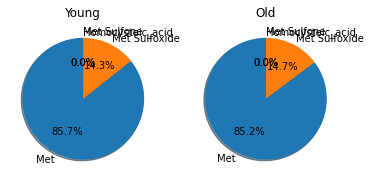

In [10]:
labels = ["Met", "Met Sulfoxide", "Met Sulfone", "Homocysteic_acid"]
sizesC = []
sizesT = []
for x, y in Youngdict.items():
    sizesC.append(y)
for x, y in Olddict.items():
    sizesT.append(y)

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.pie(sizesC, labels=labels, autopct='%1.1f%%', shadow= True, startangle = 90)
ax2.pie(sizesT, labels=labels, autopct='%1.1f%%', shadow= True, startangle= 90)
plt.title("Methionine containing peptides")
ax1.set_title("Young")
ax2.set_title("Old")
plt.show()

In [11]:
NonmodifiedC = quant.loc[quant["Sequence"].str.endswith("nan") & quant["Base Sequence"].str.contains("C")]
Sulfenic = quant.loc[quant["Sequence"].str.contains("[35]oxidation[C]",regex=False)]
Sulfinic = quant.loc[quant["Sequence"].str.contains("[425]Dioxidation[C]", regex = False)]
Cysteic = quant.loc[quant["Sequence"].str.contains("[345]Trioxidation[C]", regex = False)]
Non_modified = NonmodifiedC.append(NonmodifiedC.sum(numeric_only=True), ignore_index=True)[-1:]
Sulfenic_acid = Sulfenic.append(Sulfenic.sum(numeric_only=True), ignore_index=True)[-1:]
Sulfinic_acid = Sulfinic.append(Sulfinic.sum(numeric_only=True), ignore_index=True)[-1:]
Cysteic_acid = Cysteic.append(Cysteic.sum(numeric_only=True), ignore_index=True)[-1:]
moddfc = [Non_modified, Sulfenic_acid, Sulfinic_acid, Cysteic_acid]

In [12]:
Cysteic_acid

,Sequence,Base Sequence,Protein Groups,Gene Names,Organism,Intensity_20200828_1_5ug_testis_ingwar,Intensity_20200828_1_5ug_testis_obelisk,Intensity_20200828_1_5ug_testis_timon,Intensity_20200828_1_5ug_testis_wonny,Intensity_20200828_1_5ug_testis_bellamo,Intensity_20200828_1_5ug_testis_bendix,Intensity_20200828_1_5ug_testis_ilineus,Intensity_20200828_1_5ug_testis_kalonso,Intensity_20200828_1_5ug_testis_primat,Intensity_20200828_1_5ug_testis_vitali,Unnamed: 25,Modifications
9,NaN,NaN,NaN,0.0,0.0,10.695332,11.029602,6.068186,10.725756,10.892342,0.0,10.706907,5.963883,0.0,10.016551,0.0,NaN


In [13]:
Youngdict = {}
Olddict = {}
for i, df in enumerate(moddfc):
    Youngsub = df.loc[:, df.columns.str.contains("|".join(YoungID))]
    Oldsub = df.loc[:, df.columns.str.contains("|".join(OldID))]
    Youngsum = Youngsub.sum(axis=1)
    Oldsum = Oldsub.sum(axis=1)
    Youngdict[i] = Youngsum.values[0]
    Olddict[i] = Oldsum.values[0]

['Cys', 'Sulfenic acid', 'Sulfinic acid', 'Cysteic acid']
[698.8845135971864, 0.0, 179.3182709769747, 37.57968316336938]


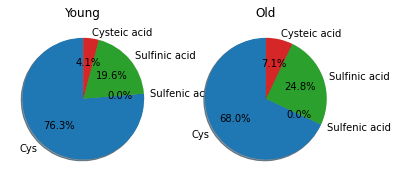

In [14]:
labelsC = ["Cys", "Sulfenic acid", "Sulfinic acid", "Cysteic acid"]
labelsT = ["Cys", "Sulfenic acid", "Sulfinic acid", "Cysteic acid"]
sizesC = []
sizesT = []

for x, y in Youngdict.items():
    sizesC.append(y)
for x, y in Olddict.items():
    sizesT.append(y)
print(labelsC)
print(sizesC)
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.pie(sizesC, labels=labelsC, autopct='%1.1f%%', shadow= True, startangle = 90)
ax2.pie(sizesT, labels=labelsT, autopct='%1.1f%%', shadow= True, startangle= 90)
ax1.set_title("Young")
ax2.set_title("Old")
plt.show()